# MSDM5003 Assignment4
__name__: LIU Jingting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part a
According to problem description, the PDF of the particle position $x$ in this simulation is $f(x)=\alpha e^{-\frac{1}{2}x^{2}}$. In Metropolis importance sampling, if the trial move $S^{'}$ is downhill, then it's accepted for sure; otherwise the probability of accepting an uphill from state $S$ is given by $r=e^{-\frac{1}{2}({x^{'}}^{2}-x^{2})}$.

In [2]:
def run_metropolis_sampling(num_steps, pos):
    pos[0] = np.random.rand()   
    for i in range(1, num_steps):
        delta = np.random.normal(0, 1)  # Propose a new position
        pos_new = pos[i - 1] + delta
        r = np.exp(-0.5 * (pos_new**2 - pos[i - 1]**2))
        if np.random.rand() < r:
            pos[i] = pos_new
        else:
            pos[i] = pos[i-1]
    return pos
                
num_steps = 1000000
x = np.zeros(num_steps)
run_metropolis_sampling(num_steps, x) 

mean_x = np.mean(x)
mean_x2 = np.mean(x**2)
mean_x3 = np.mean(x**3)
mean_x4 = np.mean(x**4)

print(r'Mean x = {:.3f}, mean x^2: {:.3f}, Mean x^3: {:.3f}, Mean x^4: {:.3f}'.format(mean_x, mean_x2, mean_x3, mean_x4))

Mean x = -0.003, mean x^2: 0.995, Mean x^3: -0.002, Mean x^4: 2.976


## Part b
To visualize the theoretical PDF, we need to calculate $\alpha$ using normalization property first.

$$ 
\int f(x) dx = \alpha \int_{-\infty}^{\infty} e^{-\frac{1}{2}x^{2}} dx = 1
$$

Let $I = \int_{-\infty}^{\infty} e^{-\frac{1}{2}x^{2}} dx$, consider the square of the integral:
$$
   I^2 = \left( \int_{-\infty}^{\infty} e^{-\frac{x^2}{2}} dx \right) \left( \int_{-\infty}^{\infty} e^{-\frac{y^2}{2}} dy \right)
$$

This can be rewritten as a double integral:
$$
   I^2 = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{\left(-\frac{x^2}{2} - \frac{y^2}{2} \right)} dx \, dy
$$

Converting it to polar coordinates gives:
$$
   I^2 = \int_{0}^{2\pi} \int_{0}^{\infty} e^{-\frac{r^2}{2}} \, r \, dr \, d\theta = 2\pi\int_{0}^{\infty} e^{-\frac{r^2}{2}} \, r \, dr
$$

Let $u = \frac{r^2}{2}$, then
$$
   \int_{0}^{\infty} e^{-\frac{r^2}{2}} \, r \, dr = \int_{0}^{\infty} e^{-u} \, du = 1
$$

Therefore,
$$
   I = \sqrt{I^{2}} = \sqrt{2\pi}
$$

Then,
$$
   \alpha = \dfrac{1}{\sqrt{2\pi}}
$$

With the normalization coefficient $\alpha$, we can plot the theoretical PDF and compare it with our generated sequence.

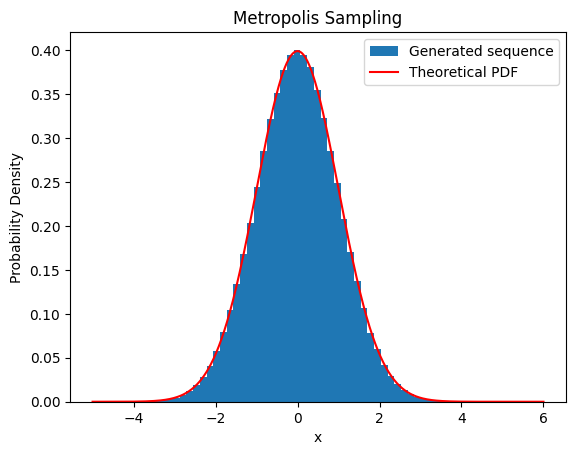

In [3]:
plt.hist(x, bins=60, density=True, label='Generated sequence')
x_vals = np.linspace(np.floor(min(x)), np.ceil(max(x)), 1000)
pdf = np.exp(-x_vals**2 / 2) / np.sqrt(2 * np.pi)    # theoretical pdf
plt.plot(x_vals, pdf, 'r-', label='Theoretical PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Metropolis Sampling')
plt.legend()
plt.show()

Looking at the plot, we can find that the distribution of our generated sequence using Metropolis sampling algorithm fits well with the theoretical PDF.